In [3]:
import OpenEphys
from matplotlib import pyplot as plt
import numpy as np

In [4]:
import matplotlib as mpl
mpl.rcParams['xtick.color'] = 'gray'
mpl.rcParams['ytick.color'] = 'gray'
mpl.rcParams['axes.labelcolor'] = 'gray'

In [5]:
%matplotlib notebook
%load_ext autoreload
%autoreload 2

In [26]:
# f_name = "/mnt/data/temp/kaveh/openEphys_data/2018-10-25_17-17-07/100_CH1.continuous"
# f_name = "/mnt/data/temp/kaveh/openEphys_data/2018-10-25_17-18-34/100_CH1.continuous"
# f_name = "/mnt/data/temp/kaveh/openEphys_data/2018-10-25_17-41-20/100_CH1.continuous"
f_name = "/mnt/data/temp/kaveh/openEphys_data/2018-10-25_17-43-54/100_CH1.continuous"

In [27]:
file_content = OpenEphys.load(f_name)

Loading continuous data...


In [28]:
def fft_spectrum(data, Fs):
    """
    Returns spectrum as Power/Frequency (dB/Hz)
    """
    yf = scipy.fftpack.fft(data)
    N = data.size
    xf = np.linspace(0.0, 1.0 / (2.0 * dt), N/2)
    power_spectrum = 2.0/(Fs*N) * (np.abs(yf[:N//2])**2) 
    return xf, 10.0*np.log10(power_spectrum)


xf, yf = fft_spectrum(signal, Fs)

plt.figure(figsize=(10,3))
plt.plot(xf, yf)
plt.title('power spectrum')
plt.xlabel('Frequency (Hz)');
plt.ylabel('Power/Frequency (dB/Hz)');
plt.ylim((-80,60))


<IPython.core.display.Javascript object>

(-80, 60)

<IPython.core.display.Javascript object>


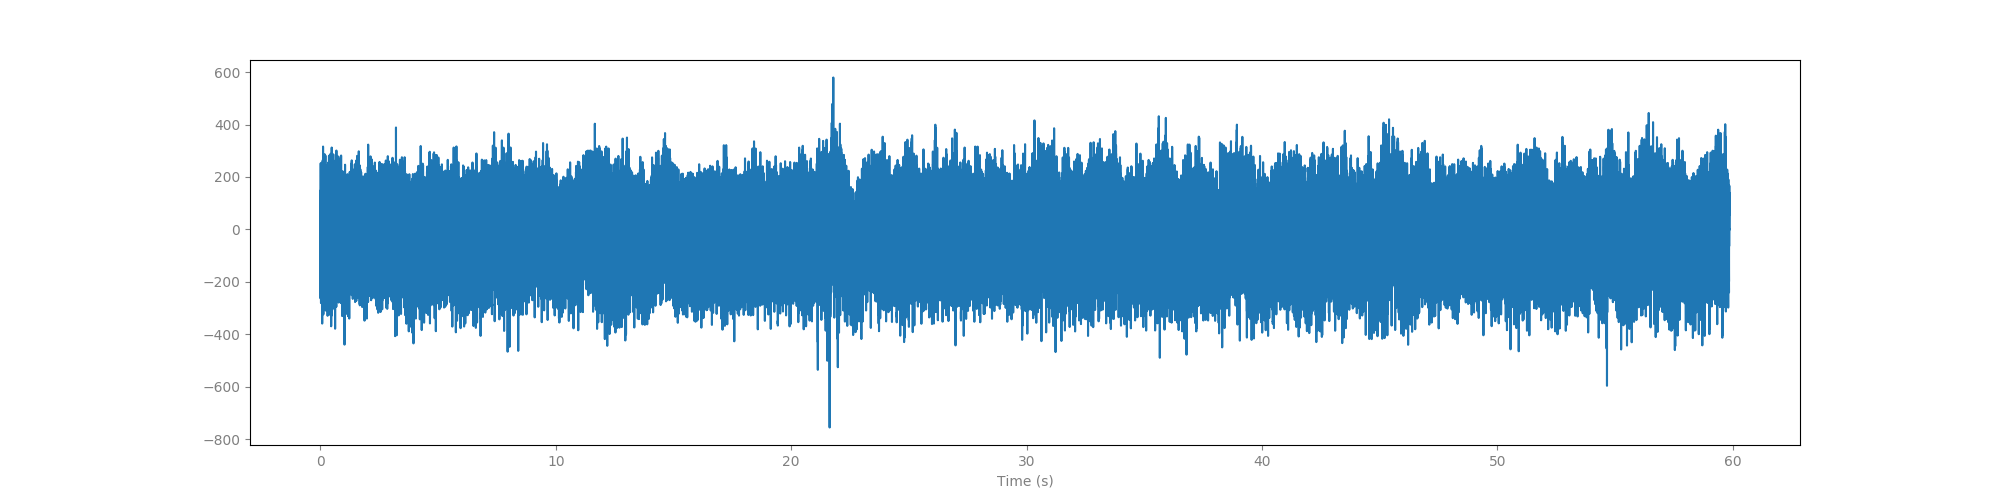

Text(0.5,0,u'Time (s)')

In [18]:
signal = np.squeeze(file_content['data'])
Fs = float(file_content['header']['sampleRate'])
dt = 1.0/Fs
plt.figure(figsize=(20,5))
plt.plot(np.arange(0, signal.size)*dt, signal)
plt.xlabel('Time (s)')
# ax = plt.gca()
# ax.tick_params(axis='x', colors='gray')
# ax.tick_params(axis='y', colors='gray')
# ax.xaxis.label.set_color('gray')


<IPython.core.display.Javascript object>


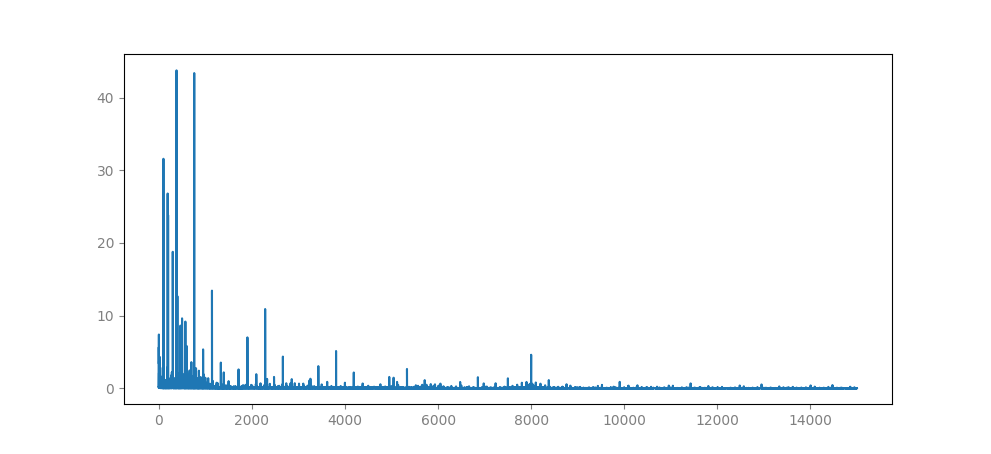

In [17]:
import scipy.signal
import scipy.fftpack


yf = scipy.fftpack.fft(signal)
N = signal.size
xf = np.linspace(0.0, 1.0 / (2.0 * dt), N/2)
power_spectrum = 2.0/N * np.abs(yf[:N//2])
plt.figure()
plt.plot(xf, power_spectrum)


# filtered = notch_all_harmonics(signal, 16.0, Fs)
# filtered = notch_all_harmonics(filtered, 100.0, Fs)
# filtered = notch_all_harmonics(filtered, 190.4, Fs)
# filtered = notch_all_harmonics(filtered, 465.4, Fs)
# filtered = notch_all_harmonics(filtered, 146.9, Fs)
# filtered = notch_all_harmonics(filtered, 153.13, Fs)
# filtered = notch_all_harmonics(filtered, 246.9, Fs)
# filtered = notch_all_harmonics(filtered, 253.13, Fs)


# filtered = butter_lowpass_filter(filtered, 1500.0, Fs, 4)

# yf = scipy.fftpack.fft(filtered)
# N = filtered.size
# xf = np.linspace(0.0, 1.0 / (2.0 * dt), N/2)
# power_spectrum = 2.0/N * np.abs(yf[:N//2])
# plt.figure()
# plt.plot(xf, power_spectrum)

# # Number of samplepoints
# N = signal.size
# # sample spacing

# yf = scipy.fftpack.fft(signal)
# xf = np.linspace(0.0, 1.0/(2.0*dt), N/2)

# fig, ax = plt.subplots()
# ax.plot(xf, 2.0/N * np.abs(yf[:N//2]))
# plt.show()

<IPython.core.display.Javascript object>


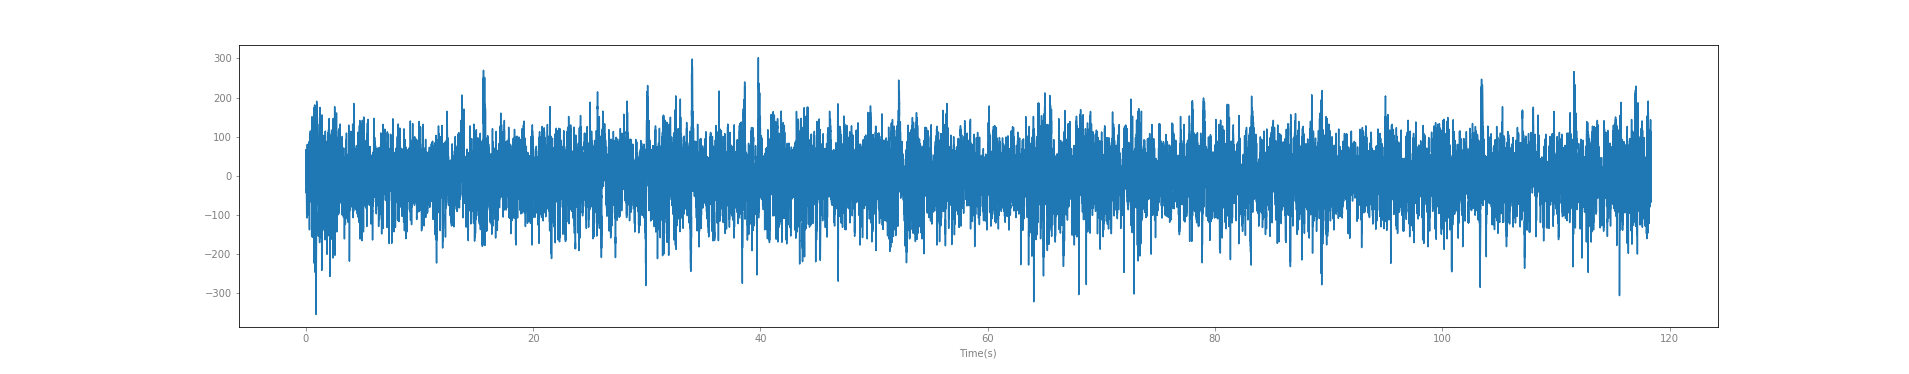

Text(0.5,0,u'Time(s)')

In [208]:
plt.figure()
plt.plot(np.arange(0, filtered.size)*dt, filtered)
plt.xlabel('Time(s)')


In [11]:
def notch_all_harmonics(signal, base_freq, sampling_rate):
    """
    Stoppass filter at the base_freq and all of its harmonics
    """
    if base_freq > sampling_rate/2.0:
        print('Invalid frequency to notch')
        return
    curr_freq = base_freq
    while curr_freq < sampling_rate/2.0:
        b, a = scipy.signal.iirnotch(curr_freq/(sampling_rate/2.0), 30)
        signal = scipy.signal.lfilter(b, a, signal)
        curr_freq = curr_freq + base_freq
        
    return signal
        

def butter_lowpass_filter(data, cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = scipy.signal.butter(order, normal_cutoff, btype='low', analog=False)
    y = scipy.signal.lfilter(b, a, data)
    return y


def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = scipy.signal.butter(order, [low, high], btype='band')
    y = scipy.signal.lfilter(b, a, data)
    return y


In [189]:
[(param, value) for param, value in plt.rcParams.items() if 'label' in param]

[(u'axes.labelcolor', u'k'),
 (u'axes.labelpad', 4.0),
 (u'axes.labelsize', u'medium'),
 (u'axes.labelweight', u'normal'),
 (u'legend.labelspacing', 0.5),
 (u'xtick.labelsize', u'medium'),
 (u'ytick.labelsize', u'medium')]